# Muhammad Nauval PAndurimba Auzan Shidiq
41822110029

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
data = pd.read_csv('markets_cleaned.csv',delimiter=';', on_bad_lines='skip')
print(data.head())

data.head(5)    

   Unnamed: 0                             name          city      county  \
0           0                    Island Market     Key Largo      Monroe   
1           1    COFFO Harvest Farmers' Market  Florida City  Miami-Dade   
2           2    COFFO Harvest Farmers' Market     Homestead  Miami-Dade   
3           3     Verde Gardens Farmers Market     Homestead  Miami-Dade   
4           4  Verde Community Farm and Market     Homestead  Miami-Dade   

     state           lat          lon  months_open  Bakedgoods  Beans  ...  \
0  Florida  -804.272.178  251.092.141            6           1      1  ...   
1  Florida   -80.482.299    2.544.985           12           0      0  ...   
2  Florida      -804.834      254.635           12           0      0  ...   
3  Florida  -803.956.069  255.067.274           12           0      0  ...   
4  Florida  -803.956.069  255.067.274            9           0      0  ...   

   Prepared  Seafood  Soap  Tofu  Trees  Vegetables  WildHarvested  Wine  

,Unnamed: 0,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,num_items_sold,state_pop
0,0,Island Market,Key Largo,Monroe,Florida,-804.272.178,251.092.141,6,1,1,...,1,1,1,0,0,1,0,0,18,19893297.0
1,1,COFFO Harvest Farmers' Market,Florida City,Miami-Dade,Florida,-80.482.299,2.544.985,12,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
2,2,COFFO Harvest Farmers' Market,Homestead,Miami-Dade,Florida,-804.834,254.635,12,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
3,3,Verde Gardens Farmers Market,Homestead,Miami-Dade,Florida,-803.956.069,255.067.274,12,0,0,...,1,0,0,0,0,1,0,0,5,19893297.0
4,4,Verde Community Farm and Market,Homestead,Miami-Dade,Florida,-803.956.069,255.067.274,9,0,0,...,0,0,0,0,0,1,0,0,5,19893297.0


In [21]:
data.isna().sum()

;name;city;county;state;lat;lon;months_open;Bakedgoods;Beans;Cheese;Coffee;Crafts;Eggs;Flowers;Fruits;Grains;Herbs;Honey;Jams;Juices;Maple;Meat;Mushrooms;Nursery;Nuts;PetFood;Plants;Poultry;Prepared;Seafood;Soap;Tofu;Trees;Vegetables;WildHarvested;Wine;num_items_sold;state_pop    0
dtype: int64

In [22]:
data = data.dropna()

In [24]:
data.columns = data.columns.str.strip()


In [25]:
print(data.columns.tolist())


[';name;city;county;state;lat;lon;months_open;Bakedgoods;Beans;Cheese;Coffee;Crafts;Eggs;Flowers;Fruits;Grains;Herbs;Honey;Jams;Juices;Maple;Meat;Mushrooms;Nursery;Nuts;PetFood;Plants;Poultry;Prepared;Seafood;Soap;Tofu;Trees;Vegetables;WildHarvested;Wine;num_items_sold;state_pop']


# Distribusi Penjualan Per-Produk

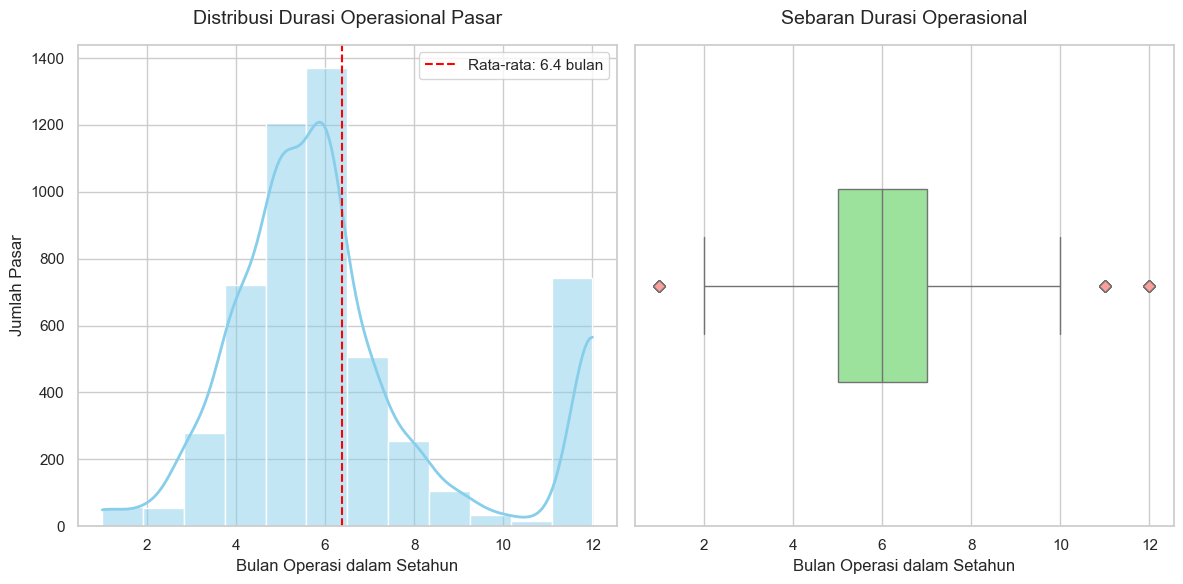

In [32]:
# Misalnya kolom aslinya adalah 'open_months'
months_data = data[data['months_open'].between(1, 12)]['months_open']

# Setup figure
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid", palette="pastel")

# Subplot 1: Histogram dengan KDE
plt.subplot(1, 2, 1)
sns.histplot(
    data=months_data,
    bins=12,
    kde=True,
    color='skyblue',
    edgecolor='white',
    line_kws={'lw': 2, 'color': 'navy'}
)
plt.title('Distribusi Durasi Operasional Pasar', fontsize=14, pad=15)
plt.xlabel('Bulan Operasi dalam Setahun', fontsize=12)
plt.ylabel('Jumlah Pasar', fontsize=12)
plt.axvline(
    months_data.mean(), 
    color='red', 
    linestyle='dashed', 
    linewidth=1.5,
    label=f'Rata-rata: {months_data.mean():.1f} bulan'
)
plt.legend()

# Subplot 2: Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(
    x=months_data,
    orient='h',
    width=0.4,
    color='lightgreen',
    flierprops=dict(markerfacecolor='r', marker='D')
)
plt.title('Sebaran Durasi Operasional', fontsize=14, pad=15)
plt.xlabel('Bulan Operasi dalam Setahun', fontsize=12)
plt.yticks([])

plt.tight_layout()
plt.show()


C:\Users\pandu\AppData\Local\Temp\ipykernel_17068\3002588949.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


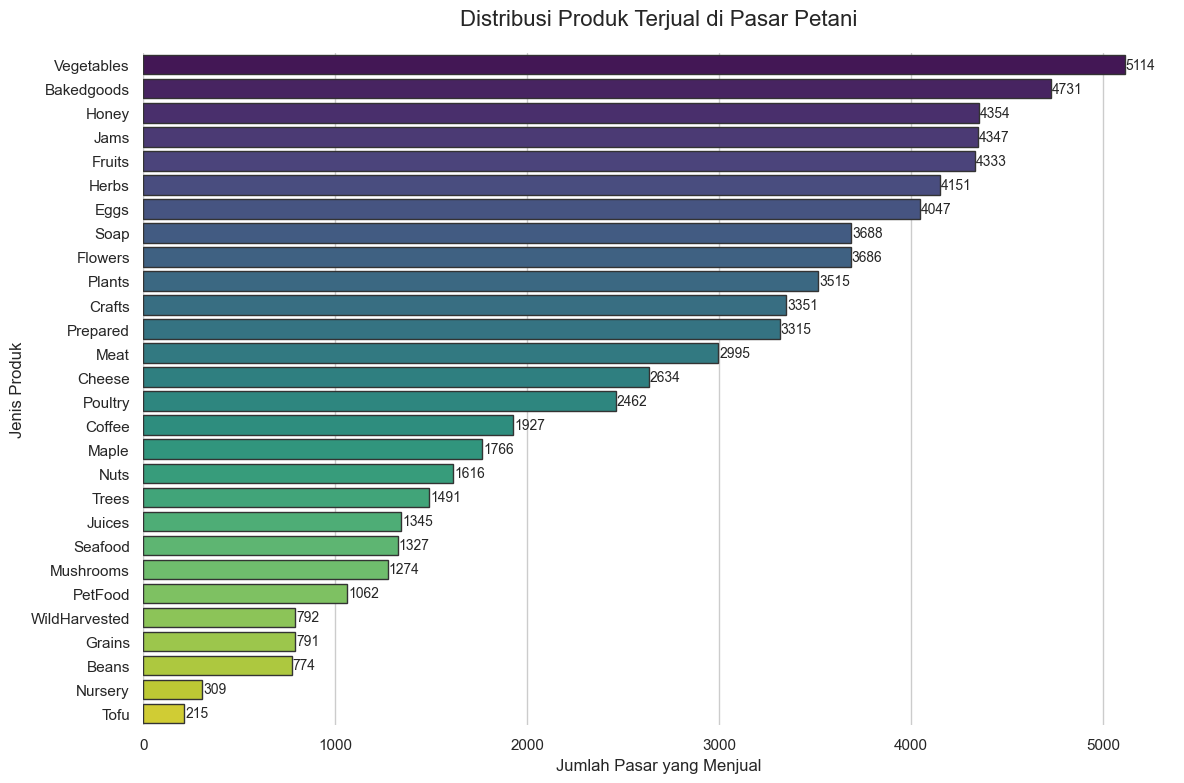

In [ ]:
product_columns = [
    'Bakedgoods', 'Beans', 'Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers',
    'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat',
    'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry', 'Prepared',
    'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables', 'WildHarvested'
]

product_counts = data[product_columns].sum().sort_values(ascending=False)

product_df = product_counts.reset_index()
product_df.columns = ['Product', 'Count']

plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

ax = sns.barplot(
    x='Count', 
    y='Product', 
    data=product_df,
    palette="viridis", 
    edgecolor=".2"
)

plt.title('Distribusi Produk Terjual di Pasar Petani', fontsize=16, pad=20)
plt.xlabel('Jumlah Pasar yang Menjual', fontsize=12)
plt.ylabel('Jenis Produk', fontsize=12)

for p in ax.patches:
    width = p.get_width()
    plt.text(
        width + 5, 
        p.get_y() + p.get_height()/2., 
        f'{int(width)}', 
        ha='left', 
        va='center',
        fontsize=10
    )

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

# Tampilan Jumlah Petani Terbanyak di setiap kota

C:\Users\pandu\AppData\Local\Temp\ipykernel_17068\313001596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')


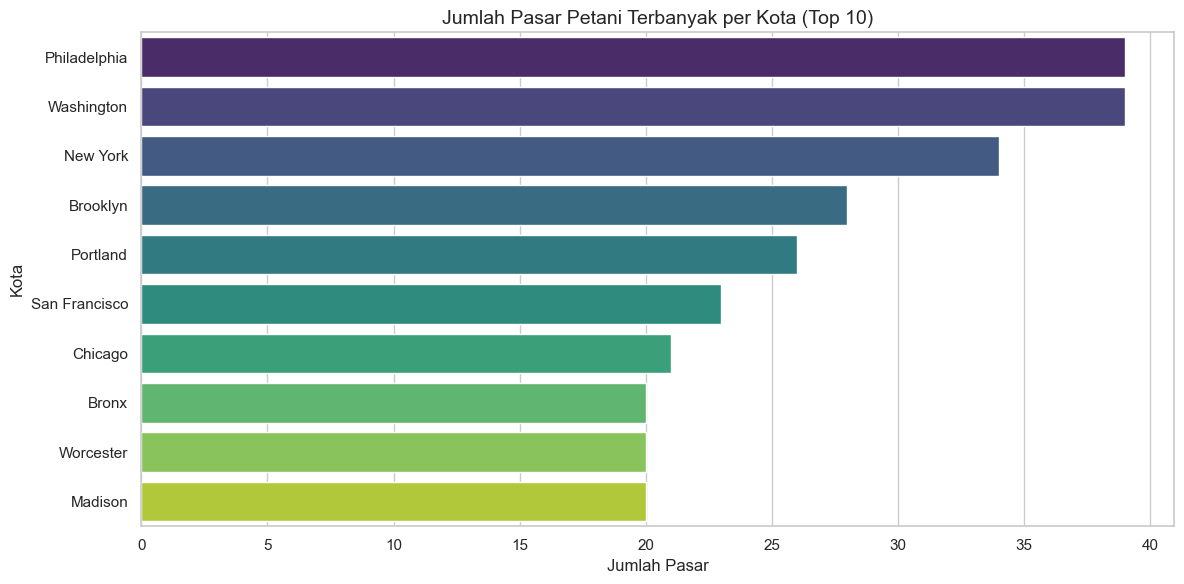

In [34]:
city_counts = data['city'].value_counts().head(10)  
county_counts = data['county'].value_counts().head(10)  

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette='viridis')
plt.title('Jumlah Pasar Petani Terbanyak per Kota (Top 10)', fontsize=14)
plt.xlabel('Jumlah Pasar')
plt.ylabel('Kota')
plt.tight_layout()
plt.show()

C:\Users\pandu\AppData\Local\Temp\ipykernel_17068\1242115587.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_counts.values, y=county_counts.index, palette='magma')


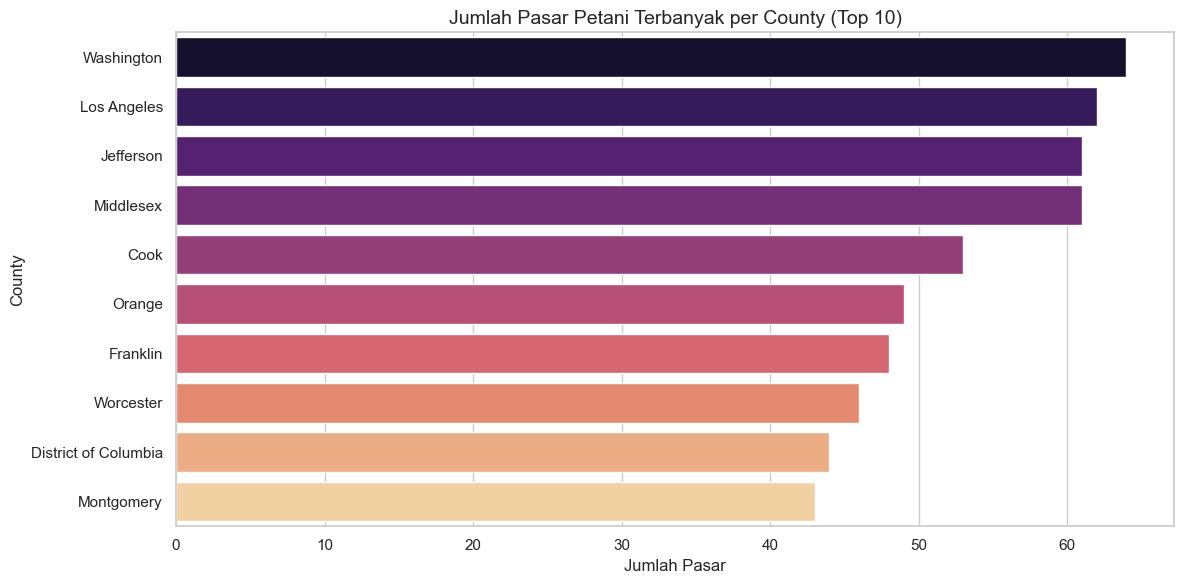

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x=county_counts.values, y=county_counts.index, palette='magma')
plt.title('Jumlah Pasar Petani Terbanyak per County (Top 10)', fontsize=14)
plt.xlabel('Jumlah Pasar')
plt.ylabel('County')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import folium

data = pd.read_csv('markets_cleaned.csv',delimiter=';')

# Perbaiki county
df['county'] = df['county'].str.strip().str.title()

# Perbaiki nama kolom koordinat
df.rename(columns={'lat': 'lon', 'lon': 'lat'}, inplace=True)

# Hitung jumlah pasar per county
market_count_by_county = df['county'].value_counts().reset_index()
market_count_by_county.columns = ['county', 'market_count']

# Ambil koordinat rata-rata per county
county_coords = df.groupby('county')[['lat', 'lon']].mean().reset_index()

# Gabungkan
county_map_data = pd.merge(market_count_by_county, county_coords, on='county', how='inner')

# Buat peta
heatmap_map = folium.Map(location=[27.994402, -81.760254], zoom_start=6)

# Tambahkan marker
for _, row in county_map_data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=row['market_count'] * 0.5,
        color='red',
        fill=True,
        fill_color='blue',
        fill_opacity=0.3,
        popup=f"{row['county']}: {row['market_count']} markets"
    ).add_to(heatmap_map)

heatmap_map